In [2]:
import numpy as np
import random

def sigmoide(z):
    """La fonction d'activation sigmoide"""
    return 1.0/(1.0+np.exp(-z))

def sigmoide_derivee(z):
    """Derivative of the sigmoid function."""
    return sigmoide(z)*(1-sigmoide(z))

class RNA(object):

    def __init__(self, nc):
        """ nc[c] contient le nombre de neurones de la couche c, c = 0 ...nombre_couches-1
        la couche d'indice 0 est la couche d'entrée
        w[c] est la marice des poids entre la couche c et c+1
        w[c][i,j] est le poids entre le neuronne i de la couche c et j de la couche c+1
        i = 0 correspond au biais par convention
        les poids sont initialisés avec un nombre aléatoire selon une distribution N(0,1)
        """
        self.nombre_couches = len(nc)
        self.nc = nc
        np.random.seed(42)
        self.w = [np.random.randn(x+1, y) for x, y in zip(nc[:-1], nc[1:])]
        print("nc:",nc)
        print("zip(nc[:-1], nc[1:])",zip(nc[:-1], nc[1:]))
        print("w:",self.w)

    def propagation_avant(self, a):
        """a est un vecteur d'activation. a[0]=1 correspond au biais"""
        for wc in self.w:
            a = np.vstack((np.ones(1),sigmoide(np.dot(wc.transpose(), a))))
        return a

    def SGD(self, donnees_entrainement_x, donnees_entrainement_y, epochs, taille_mini_batch, eta,
            donnees_test_x, donnees_test_y):
        """Train the neural network using mini-batch stochastic
        gradient descent.  The ``donnees_entrainement`` is a list of tuples
        ``(x, y)`` representing the training inputs and the desired
        outputs.  The other non-optional parameters are
        self-explanatory.  If ``donnees_test`` is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out.  This is useful for
        tracking progress, but slows things down substantially."""
        
        n = len(donnees_entrainement_x)
        donnees_entrainement=[(donnees_entrainement_x[i],donnees_entrainement_y[i]) for i in range(n)]
        n_test = len(donnees_test_x)
        donnees_test=[(donnees_test_x[i],donnees_test_y[i]) for i in range(n_test)]

        for j in range(epochs):
            random.shuffle(donnees_entrainement)
            mini_batches = [
                donnees_entrainement[k:k+taille_mini_batch]
                for k in range(0, n, taille_mini_batch)]
            for mini_batch in mini_batches:
                self.mini_batch(mini_batch, eta)
            print ("Epoch {0}: {1} / {2}".format(j, self.evaluate(donnees_test), n_test))

    def mini_batch(self, mini_batch, eta):
        """Update the network's w and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
        is the learning rate."""
        nabla_w = [np.zeros(w.shape) for w in self.w]
        for x, y in mini_batch:
            delta_nabla_w = self.retropropagation(x, y)
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.w = [w-(eta/len(mini_batch))*nw
                        for w, nw in zip(self.w, nabla_w)]

    def retropropagation(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.w``."""
        # print(x,y)
        # print(type(x))
        # print(type(y))
        nabla_w = [np.zeros(wc.shape) for wc in self.w]
        # propagation avant avec stockage des activations[0] est à 1 pour les biais
        activation = np.vstack((np.ones(1),x.reshape(x.size,1))) # activation
        activations = [np.vstack((np.ones(1),x.reshape(x.size,1)))] # liste des activations couche par couche
        zs = [] # # liste des z couche par couche

        for wc in self.w:
            z = np.dot(wc.transpose(), activation)
            zs.append(z)
            activation = np.vstack((np.ones(1),sigmoide(z))) 
            activations.append(activation)
        # print("zs:",zs)
        # print("activations:",activations)
        
        # rétropropagation 
        # delta est le vecteur des dérivées par rapport zjc-1
        # calcul de la dérivée par rapport a z pour la couche de sortie
        delta = derivee_cout(activations[-1][1:], y) * sigmoide_derivee(zs[-1])
        nabla_w[-1] = np.dot(activations[-2],delta.transpose())
        # print("del w couche[2]:",nabla_w[-1])

        for l in range(2, self.nombre_couches):
            z = zs[-l]
            sp = sigmoide_derivee(z)
            delta = np.dot(self.w[-l+1], delta)[1:] * sp
            # print("z:",z)
            # print("sp:",sp)
            # print("delta:",delta)
            # print("activations:",activations)
            # print("l:",l)
            # print("activations[-l-1]:",activations[-l-1])
            nabla_w[-l] = np.dot(activations[-l-1],delta.transpose())
        return nabla_w

    def evaluate(self, donnees_test):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        test_results = [(np.argmax(self.propagation_avant(np.vstack((np.ones(1),x.reshape(x.size,1))))), y)
                        for (x, y) in donnees_test]
        somme_carres=0
        for (x, y) in donnees_test:
            y_prediction = self.propagation_avant(np.vstack((np.ones(1),x.reshape(x.size,1))))
#            print("y_prediction:",y_prediction,"y:",y)
            somme_carres=somme_carres+(y_prediction[1]-y)**2
        return somme_carres    
#         return sum((x-y)**2 for (x, y) in test_results)

def derivee_cout(output_activations, y):
    """ Vecteur des dérivées de la fonction de cout vs aj"""
    return (output_activations-y)

theta0_estime = 5.5274658287008736  theta1_estime =  0.9486997944551838
Erreur quadratique moyenne: 0.8376914371160101


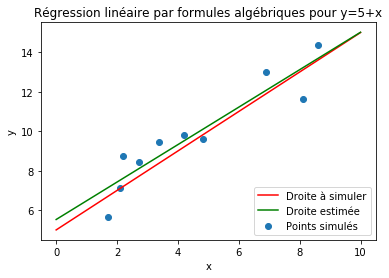

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def h_lineaire_univarie(theta,x):
    return theta[0]+theta[1]*x
def eqm(Y_estime,Y,m):
    return (((Y_estime-Y)**2).sum())*1/m

# Génération de données qui suivent une distribution linéaire univariée avec résidus ~ N(0,1)
m=10 # nombre de lignes de données
theta_simule = (5,1)
np.random.seed(22) # Pour obtenir des résultats reproductibles avec les données aléatoires

X = np.random.rand(m)*m # m valeurs de x entre 0 et m
Y = h_lineaire_univarie(theta_simule,X)+np.random.randn(m) # Résidus N(0,1)
plt.scatter(X,Y,label = 'Points simulés') # Pour afficher les données aléatoires simulées



# Pour afficher la droite du modèle simulé
X_modele = np.arange(0,m+1,1) 
Y_modele = h_lineaire_univarie(theta_simule,X_modele)
plt.plot(X_modele, Y_modele,'-r',label = 'Droite à simuler')

# Calculer les estimations de theta par les formules dérivées algébriquement
X_bar = X.sum()/m
Y_bar = Y.sum()/m
CovXY = (((X-X_bar)*(Y-Y_bar)).sum())/m
VarX = (((X-X_bar)**2).sum())/m
theta1_estime = CovXY/VarX
theta0_estime = Y_bar-theta1_estime*X_bar
print("theta0_estime =",theta0_estime," theta1_estime = ",theta1_estime)

Y_estime = theta0_estime + theta1_estime*X # Valeurs estimées pour X
print("Erreur quadratique moyenne:", eqm(Y_estime,Y,m))

# Pour afficher la droite de régression estimée
Y_droite_estimee =  theta0_estime + theta1_estime*X_modele # Valeurs estimées pour X_modele
plt.plot(X_modele, Y_droite_estimee, '-g',label = 'Droite estimée')

plt.title("Régression linéaire par formules algébriques pour y=5+x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right')
plt.show()
